In [1]:
# importing neccessary libraires

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [3]:
# reading the dataset

df=pd.read_csv("D:\Projects\happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.shape

(158, 12)

# Data preprocessing

In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

as there is no null values so it's a decent dataset

In [6]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

As Country, Region and Happiness Rank have no impact on data as they don't reflect any qualititaive feature so we can remove them

In [9]:
df=df.drop(["Country","Region","Happiness Rank"],axis=1)
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# EDA

correlation matrix

In [10]:
df.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

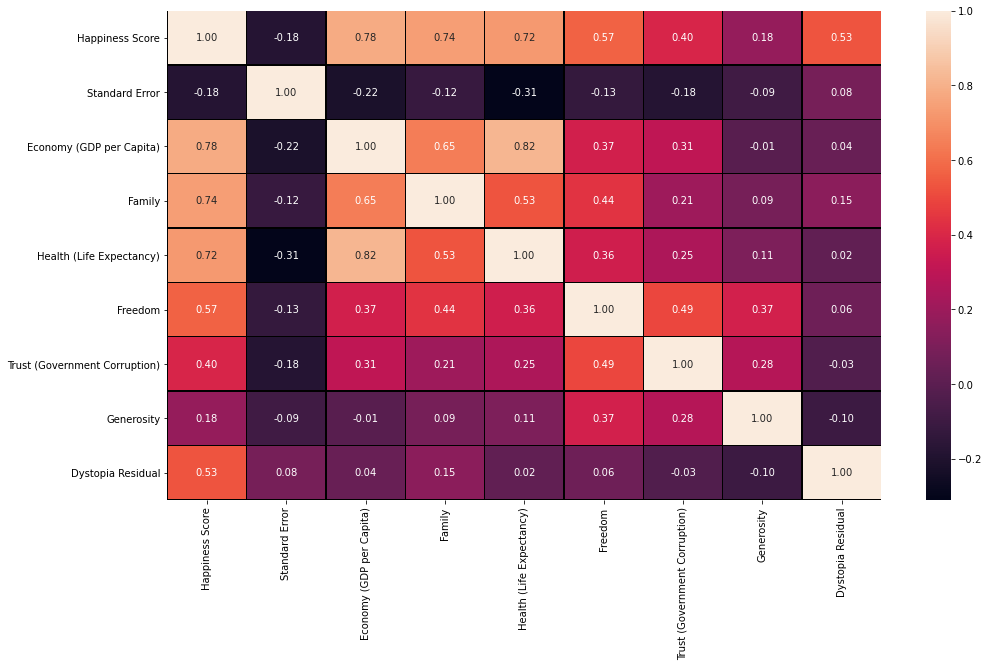

In [11]:
# plotting the correlation on graph

plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor="black",fmt='.2f')

# outcome of correlation

as we can see this data has all the positive correlation except standard error which means as SE increases, score decreases

also we see that all the columns except Standard error and generosity have very good correlation value with respect to happiness score.

# Outliers

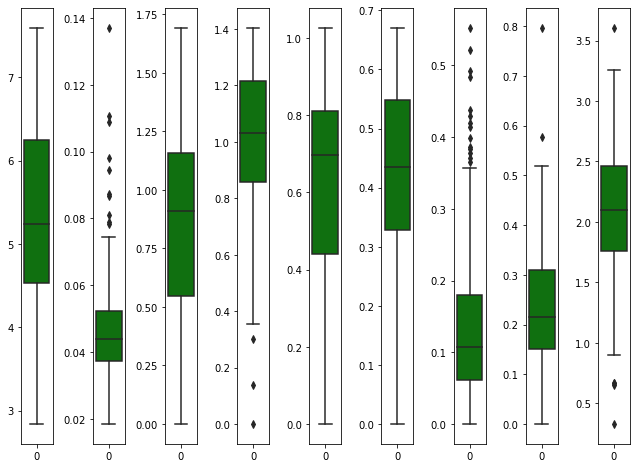

In [12]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,ncol*3))
for i in range(0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='green',orient="v",)
    plt.tight_layout()

as we can see for standard error and generosity we have many outliers

In [13]:
# checking for skewness

df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

with skewness threshold to be +/-0.6, columns having skewness standard error Family Health Trust Generosity

so as per the skewness score and outliers and correlation score we can coclude that standard error and generosity can be removed from the data to give better result

In [14]:
df=df.drop(["Standard Error","Generosity"],axis=1)
df.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,2.45176


# Model Development 

In [16]:
y=df['Happiness Score']
x=df.drop('Happiness Score', axis=1)

In [20]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.36962124e+00,  1.32028142e+00,  1.26340809e+00,
         1.57743784e+00,  2.30965159e+00,  7.58258088e-01],
       [ 1.13522625e+00,  1.51445776e+00,  1.28943383e+00,
         1.33245589e+00, -1.64795307e-02,  1.09285682e+00],
       [ 1.19286069e+00,  1.36105403e+00,  9.92228817e-01,
         1.46965910e+00,  2.84277380e+00,  7.12335259e-01],
       [ 1.52512972e+00,  1.25192192e+00,  1.03514490e+00,
         1.60513145e+00,  1.85208080e+00,  6.63893379e-01],
       [ 1.19487640e+00,  1.22120434e+00,  1.11805373e+00,
         1.36041579e+00,  1.55572536e+00,  6.39337171e-01],
       [ 1.10518965e+00,  1.20518259e+00,  1.05097959e+00,
         1.41846586e+00,  2.25900540e+00,  9.43417340e-01],
       [ 1.20271529e+00,  1.06489092e+00,  1.06612405e+00,
         1.24584679e+00,  1.46019962e+00,  6.64600163e-01],
       [ 1.20836426e+00,  1.09767107e+00,  1.13932906e+00,
         1.53902627e+00,  2.46560175e+00,  4.93322871e-01],
       [ 1.00547410e+00,  1.21037585e+00,  1.129

feeding 70% data to train the model as we have less data with random state =355

In [21]:
x_train,x_test,y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=355)

In [22]:
# using Linear regression model

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
print(f"Regression R2:{lr.score(x_test,y_test)}")

Regression R2:0.9894886582452134


In [24]:
lr.score(x_train,y_train)

0.9904269298132975

In [25]:
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.9894886582452134

# Model Saving

In [26]:
import pickle
filename='Happines_score.pkl'
pickle.dump(lr,open(filename,'wb'))